# Лабораторная работа № 1.

# Кочеганова Л.М.    17-АС

#   Вариант №1

1) Определите количество мужчин и женщин, которые ехали на корабле.

In [143]:
import pandas as pd
import operator
import seaborn
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from matplotlib.pyplot import show 

Titan_df = pd.read_csv('train.csv')
print((Titan_df.groupby(['Sex'])['PassengerId'].count()))
print('-------------------------------')
print(Titan_df.groupby(['Sex', 'Survived'])['PassengerId'].count())

Sex
female    314
male      577
Name: PassengerId, dtype: int64
-------------------------------
Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: PassengerId, dtype: int64


2) Определите какой части пассажиров удалось выжить. Посчитайте долю выживших пассажиров.

In [144]:
x = int((Titan_df.groupby(['Sex'])['PassengerId'].count()).loc['female'] + (Titan_df.groupby(['Sex'])['PassengerId'].count()).loc['male'])
y = int((Titan_df.groupby(['Survived'])['PassengerId'].count()).loc[1])
print('Всего пассажиров:')
print(x)
print('Выживших:')
print(y)
print('Процент выживших:')
print(y/x)

Всего пассажиров:
891
Выживших:
342
Процент выживших:
0.3838383838383838


3) Какую долю пассажиры первого класса составляли среди всех пассажиров?

In [145]:
print('Доля пассажиров 1 класса среди всех пассажиров:')
print(int((Titan_df.groupby(['Pclass'])['PassengerId'].count()).loc[1])/x)

Доля пассажиров 1 класса среди всех пассажиров:
0.24242424242424243


4) Какого возраста были пассажиры? Посчитайте среднее и медиану возраста пассажиров. 

In [146]:
print('Средний возраст пассажиров:')
print(Titan_df['Age'].mean())
print('Медиана возраста:')
print(Titan_df['Age'].median())

Средний возраст пассажиров:
29.69911764705882
Медиана возраста:
28.0


5) Коррелируют ли число братьев/сестер с числом родителей/детей? Посчитайте корреляцию Пирсона между признаками SibSp и Parch. Оцените значение p-value.Постройте плотность распределения признаков SibSpи Parch.

Значение корреляции и p-value:


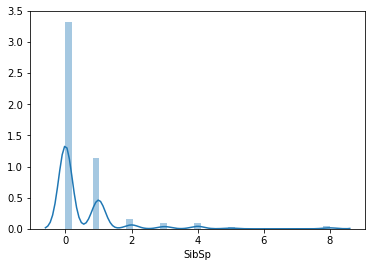

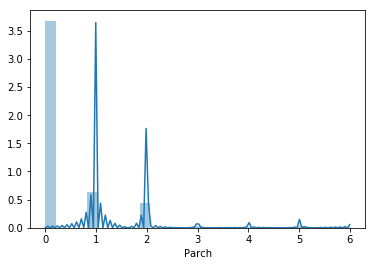

(0.41483769862015613, 2.2418236681398336e-38)

In [147]:
print('Значение корреляции и p-value:')
seaborn.distplot(Titan_df['SibSp']).plot() 
show()  
seaborn.distplot(Titan_df['Parch']).plot()  
show()  
pearsonr(Titan_df['SibSp'], Titan_df['Parch'])


6) Какое самое популярное женское имя на корабле? Извлеките изполного имени пассажира (колонка Name) его личное имя (FirstName). Попробуйте вручную разобрать несколько значений столбца Name и выработать правило для извлечения имен, а также разделения их на женские и мужские.

In [148]:
    i = 0
    res = Titan_df['Name'].get_values()
    list_name = []
    for name_row in res:
        is_woman = ("Miss." in name_row) or ("Mrs." in name_row)
        if is_woman:
            index_brace = name_row.find("(")
            if index_brace != -1:
                name_row = name_row[index_brace + 1:]
                index_space = name_row.find(" ")
                name_row = name_row[:index_space]
                list_name.append(name_row)
            else:
                index_point = name_row.find(".")
                name_row = name_row[index_point + 2:]
                index_space = name_row.find(" ")
                name_row = name_row[:index_space]
                list_name.append(name_row)
            i += 1
    print(list_name)
    
    dict_name = {}
    for name in list_name:
        value = dict_name.get(name)
        if value is None:
            dict_name[name] = 1
        else:
            dict_name[name] = value + 1
    sorted_x = sorted(dict_name.items(), key=operator.itemgetter(1))
    
    print(sorted_x)

['Florence', 'Lain', 'Lily', 'Elisabeth', 'Adele', 'Marguerite', 'Elizabet', 'Hulda', 'Mary', 'Emelia', 'Fatim', 'Anna', 'Torborg', 'Selma', 'Ellen', 'Marie', 'Mary', 'Augusta', 'Jamil', 'Johanna', 'Dorothy', 'Simonne', 'Margaret', 'Bridge', 'Josefine', 'Myna', 'Elizabeth', 'Emil', 'Constance', 'Ameli', 'Elizabeth', 'Erna', 'Lillian', 'Elizabet', 'Brigdet', 'Berth', 'Maria', 'Mabel', 'Ada', 'Matild', 'Anna', 'Berth', 'Hilen', 'Katriin', 'Malak', 'Ellis', 'Susa', 'Ann', 'Grace', 'Mathilde', 'Helen', 'Sultana', 'Anna', 'Elin', 'Robina', 'Edith', 'Katherine', 'Elizabeth', 'Edith', 'Anna', 'Eleanor', 'Ann', 'Constance', 'Luise', 'Johanna', 'Rosa', 'Carla', 'Margaret', 'Elis', 'Margaret', '"Mrs', 'Telma', 'Helen', 'Clear', 'Madelein', 'Eliin', 'Albin', 'Mathild', 'Irene', 'Lillian', 'Alice', 'Marjorie', 'Thamin', 'Katherine', 'Agda', 'Anna', 'Elna', 'Helena', 'Hanne', 'Gertrude', 'Glady', 'Ann', 'Lutie', 'Deli', 'Edith', 'Ameli', 'Elizabeth', 'Hanora', 'Kornelia', 'Augusta', 'Rosa', 'Kat', 

Как видим, самое популярное имя - Anna (12 человек).

7) Коррелирует ли класс, которым ехал пассажир, с выживаемостью?

In [149]:
print('По величине корелляции делаем вывод, что коррелляция достаточно слабая')
pearsonr(Titan_df['Pclass'], Titan_df['Survived']) 


По величине корелляции делаем вывод, что коррелляция достаточно слабая


(-0.33848103596101536, 2.5370473879804202e-25)

8) Визуализируйте гистограммы возраста для выживших и не выживших пассажиров. Сделайте выводы. Отобразите данные на одном и нескольких графиках

График возраста выживших пассажиров


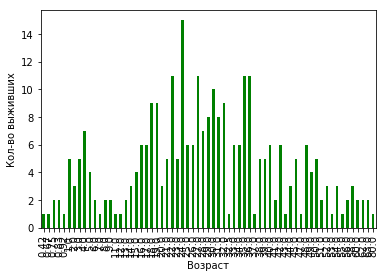

График возраста погибших пассажиров


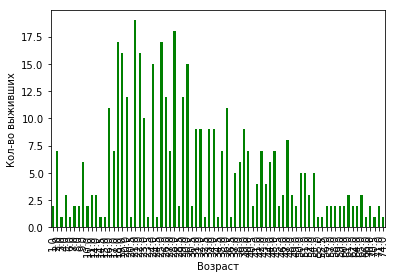

Как видно из графиков, больше всего погибших и выживших составляют люди в возрасте от 20 до 30 лет.


In [150]:
print('График возраста выживших пассажиров')
((Titan_df[Titan_df.Survived == 1][:]).groupby(['Age'])['PassengerId'].count()).plot(kind='bar', color='green')
plt.xlabel('Возраст')
plt.ylabel('Кол-во выживших')
show()
print('График возраста погибших пассажиров')
((Titan_df[Titan_df.Survived == 0][:]).groupby(['Age'])['PassengerId'].count()).plot(kind='bar', color='green')
plt.xlabel('Возраст')
plt.ylabel('Кол-во выживших')
show()
print('Как видно из графиков, больше всего погибших и выживших составляют люди в возрасте от 20 до 30 лет.')

9) Визуализируйте гистограммы возраста для выживших и не выживших пассажиров по классам. Сделайте выводы.

График возраста выживших пассажиров 1 класса:


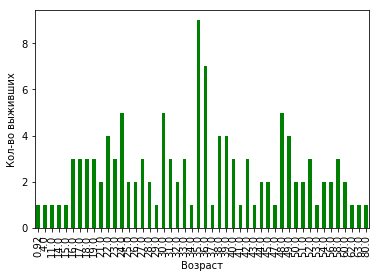

График возраста выживших пассажиров 2 класса:


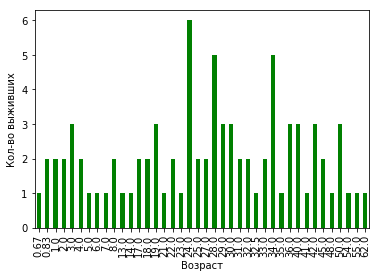

График возраста выживших пассажиров 3 класса:


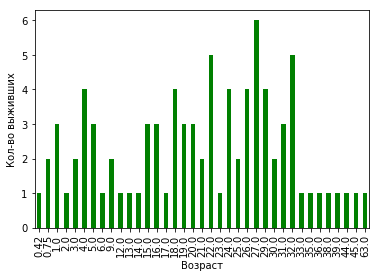

График возраста погибших пассажиров 1 класса:


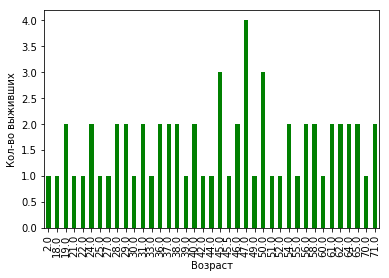

График возраста погибших пассажиров 2 класса:


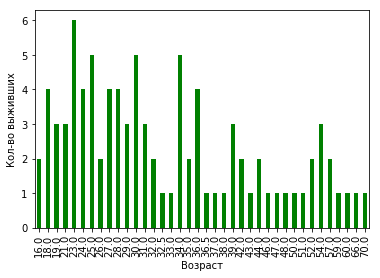

График возраста погибших пассажиров 3 класса:


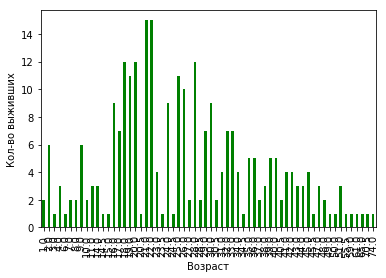

Судя по графикам можно сказать, что чем выше класс пассажира, тем больше вероятность его спасения.


In [151]:
Titan_df2 = Titan_df[Titan_df.Survived == 1][:]
print('График возраста выживших пассажиров 1 класса:')
((Titan_df2[Titan_df2.Pclass == 1][:]).groupby(['Age'])['PassengerId'].count()).plot(kind="bar", color='green')
plt.xlabel('Возраст')
plt.ylabel('Кол-во выживших')
show()
print('График возраста выживших пассажиров 2 класса:')
((Titan_df2[Titan_df2.Pclass == 2][:]).groupby(['Age'])['PassengerId'].count()).plot(kind="bar", color='green')
plt.xlabel('Возраст')
plt.ylabel('Кол-во выживших')
show()
print('График возраста выживших пассажиров 3 класса:')
((Titan_df2[Titan_df2.Pclass == 3][:]).groupby(['Age'])['PassengerId'].count()).plot(kind="bar", color='green')
plt.xlabel('Возраст')
plt.ylabel('Кол-во выживших')
show()

Titan_df2 = Titan_df[Titan_df.Survived == 0][:]
print('График возраста погибших пассажиров 1 класса:')
((Titan_df2[Titan_df2.Pclass == 1][:]).groupby(['Age'])['PassengerId'].count()).plot(kind="bar", color='green')
plt.xlabel('Возраст')
plt.ylabel('Кол-во выживших')
show()
print('График возраста погибших пассажиров 2 класса:')
((Titan_df2[Titan_df2.Pclass == 2][:]).groupby(['Age'])['PassengerId'].count()).plot(kind="bar", color='green')
plt.xlabel('Возраст')
plt.ylabel('Кол-во выживших')
show()
print('График возраста погибших пассажиров 3 класса:')
((Titan_df2[Titan_df2.Pclass == 3][:]).groupby(['Age'])['PassengerId'].count()).plot(kind="bar", color='green')
plt.xlabel('Возраст')
plt.ylabel('Кол-во выживших')
show()
print('Судя по графикам можно сказать, что чем выше класс пассажира, тем больше вероятность его спасения.')

10) Постройте столбчатую диаграмму количества людей: мужчины, женщины, дети.

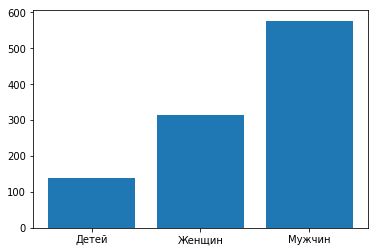

In [142]:
import pylab as pl
male = int((Titan_df.groupby(['Sex'])['PassengerId'].count()).loc['male'])
female = int((Titan_df.groupby(['Sex'])['PassengerId'].count()).loc['female'])
children = len((Titan_df[Titan_df.Age <= 18]).index)


xdata = ["Мужчин", "Женщин", "Детей"]
ydata = [male, female, children]
pl.bar (xdata, ydata)
pl.show()